## Preparación columna `edad_aparente`

Seleccionamos la columna **`edad_aparente`** para aplicar **preparación de datos** debido a la presencia de valores extremos y posibles errores (p. ej., 0, 1 o > 90 años). La meta es **mejorar la calidad** y **reducir sesgos** previos a modelado o análisis.

#### Antes de preparar la columna `edad_aparente`

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = "dataset_edad.csv"
df = pd.read_csv(csv_path)
print(df.info())

print("\nDescripción estadística del DataFrame antes de preparar la data:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   edad_aparente  485 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB
None

Descripción estadística del DataFrame antes de preparar la data:
       edad_aparente
count     485.000000
mean       30.476289
std        15.157505
min         0.000000
25%        19.000000
50%        28.000000
75%        38.000000
max       105.000000


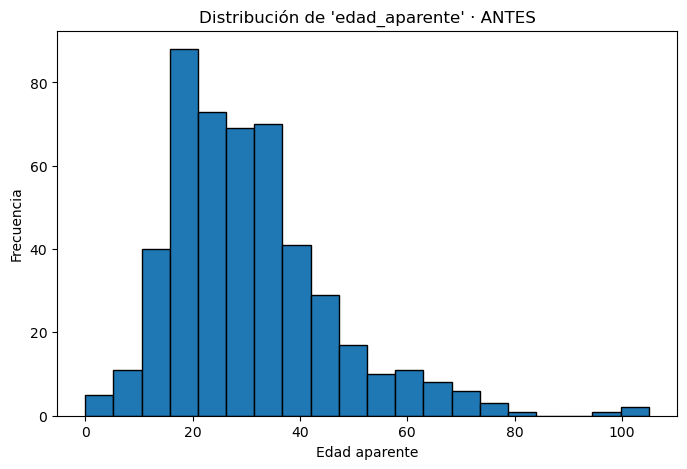

In [33]:
# Histograma antes de la preparación
plt.figure(figsize=(8,5))
plt.hist(df['edad_aparente'], bins=20, edgecolor="black")
plt.title("Distribución de 'edad_aparente' · ANTES")
plt.xlabel("Edad aparente")
plt.ylabel("Frecuencia")
plt.show()

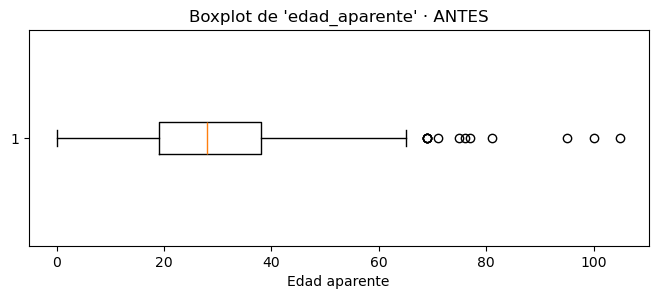

In [34]:
# Boxplot después (para validar outliers remanentes)
plt.figure(figsize=(8,2.8))
plt.boxplot(df['edad_aparente'], vert=False, whis=1.5)
plt.title("Boxplot de 'edad_aparente' · ANTES")
plt.xlabel("Edad aparente")
plt.show()

#### Preparación de `edad_aparente`

**Regla simple:** filtrar edades fuera del rango **[5, 90]** años.  
Motivación: valores extremos suelen provenir de errores de lectura/etiquetado o casos no representativos para el objetivo.

In [35]:
# Aplicar preparación
rango_min, rango_max = 5, 90
mask = (df['edad_aparente'] >= rango_min) & (df['edad_aparente'] <= rango_max)
df_prep = df.loc[mask].copy()

n_antes = len(df)
n_despues = len(df_prep)
removidos = n_antes - n_despues
porc_removido = 100.0 * removidos / n_antes if n_antes else 0.0

impacto_tamaño = pd.Series({
    "n_antes": n_antes,
    "n_despues": n_despues,
    "removidos": removidos,
    "porcentaje_removido": round(porc_removido, 2)
})
impacto_tamaño.to_frame("impacto_tamaño")

,impacto_tamaño
n_antes,485.00
n_despues,478.00
removidos,7.00
porcentaje_removido,1.44


In [36]:
# Diagnóstico después de preparar
print("\nDescripción estadística del DataFrame después de preparar la data:")
print(df_prep.describe())



Descripción estadística del DataFrame después de preparar la data:
       edad_aparente
count     478.000000
mean       30.282427
std        13.982834
min         5.000000
25%        19.000000
50%        28.000000
75%        37.000000
max        81.000000


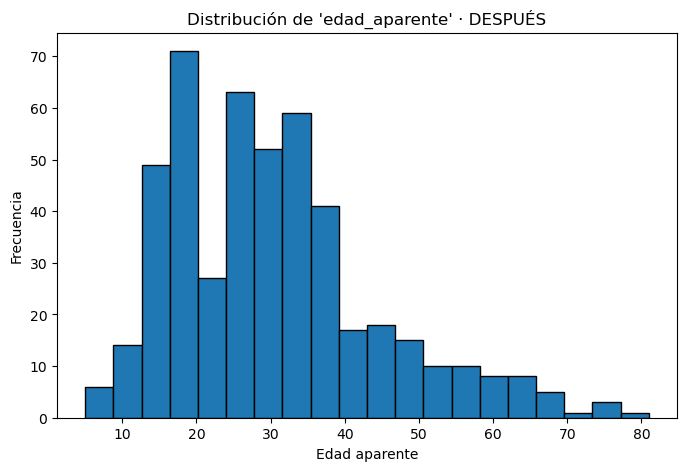

In [37]:
# Histograma después (nueva figura)
plt.figure(figsize=(8,5))
plt.hist(df_prep, bins=20, edgecolor="black")
plt.title("Distribución de 'edad_aparente' · DESPUÉS")
plt.xlabel("Edad aparente")
plt.ylabel("Frecuencia")
plt.show()

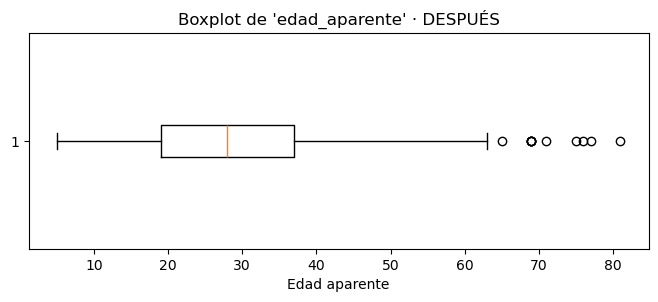

In [38]:
# Boxplot después (para validar outliers remanentes)
plt.figure(figsize=(8,2.8))
plt.boxplot(df_prep, vert=False, whis=1.5)
plt.title("Boxplot de 'edad_aparente' · DESPUÉS")
plt.xlabel("Edad aparente")
plt.show()

#### Comparación antes y despues de la preparación de `edad_aparente`

In [39]:
# Estadísticas comparativas antes y después en una sola tabla
print("\nEstadísticas comparativas de 'edad_aparente' antes y después de la preparación:")

# comparativo
estadisticas_comparativas = pd.DataFrame({
    'Antes': df['edad_aparente'].describe(),
    'Después': df_prep['edad_aparente'].describe()
})

print(estadisticas_comparativas)


Estadísticas comparativas de 'edad_aparente' antes y después de la preparación:
            Antes     Después
count  485.000000  478.000000
mean    30.476289   30.282427
std     15.157505   13.982834
min      0.000000    5.000000
25%     19.000000   19.000000
50%     28.000000   28.000000
75%     38.000000   37.000000
max    105.000000   81.000000


#### Conclusiones del Análisis de Preparación de Datos

**Resumen del impacto de la preparación:**

La aplicación del filtro de rango [5, 90] años en la variable `edad_aparente` resultó en una preparación **mínimamente invasiva** pero **efectiva** para mejorar la calidad del dataset:

**1. Impacto cuantitativo:**
- **Registros removidos**: 7 de 485 (1.44% del dataset)
- **Preservación de datos**: 98.56% de los datos originales se mantuvieron
- **Eficiencia del filtro**: Se eliminaron únicamente los valores más extremos y potencialmente erróneos

**2. Mejoras en la distribución:**
- **Reducción de variabilidad**: La desviación estándar disminuyó de 15.16 a 13.98 años
- **Eliminación de valores anómalos**: Se removieron edades implausibles (0 años) y extremas (>90 años)
- **Estabilidad de tendencias centrales**: La mediana se mantuvo en 28 años y la media cambió mínimamente (30.48 → 30.28)

**3. Observaciones visuales:**
- **Distribución más limpia**: Los histogramas muestran una distribución más suave sin los picos artificiales en los extremos
- **Reducción de outliers**: Los boxplots confirman la eliminación efectiva de valores atípicos extremos
- **Preservación del patrón**: La forma general de la distribución se mantiene, indicando que no se alteró la estructura natural de los datos

**4. Validación del enfoque:**
- **Criterio justificado**: El rango [5, 90] años es biológicamente plausible para edad aparente
- **Balance óptimo**: Se logró limpiar datos erróneos sin perder información valiosa
- **Preparación conservadora**: La baja tasa de remoción (1.44%) sugiere un filtrado apropiado